This notebook is under heavy construction at the moment

# Import libraries

In [1]:
import pickle
from pathlib import Path
from skimage import io

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# import keras library
import keras

# import Sequential from the keras models module
from keras.models import Sequential

# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

2022-11-07 10:53:46.507589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Functions

The first helpful function here, stores all images in a numpy array by following these steps:

Looping over all indices:

1. It loads the images using the skimage package*. In MATLAB, imread() is also the function used for reading images. 
2. It converts them to a np.float64 type before storing them.
3. It adds the converted images to a list at each iteration

It converts the list to a numpy array before returning it.


*(which is an image processing toolbox, in some ways similar to PIL if you are more familiar with PIL)

In [2]:
def get_images_array(data):
    ''' function to store images. 
    Input: image indices as array of int types
    Output: numpy array containing images as np.float64 type'''
    
    # create empty list
    image_list = []

    for i in data.index:
         
        
        img = io.imread('MLI_all_tiff/resize/{}.tif'.format(i)).astype(np.float64)

        # append to list of all images
        image_list.append(img)

    # convert image list to single array
    X = np.array(image_list)
    return(X)

# Load Images and Image Data

In [2]:
# load lung image tissue data using pandas
data = pd.read_excel("oldMLI_data.xlsx",index_col = 0)


SAL    123
ETX    110
Name: AN Tx, dtype: int64


In [12]:
# data = data.drop(["r1"], axis = 1)

# print value counts for treatment types
print(data["AN Tx"].value_counts())

# assign the treatment label values to y
y = data["AN Tx"].values

      day  slide  subslide  tissue area fraction  length of tissue (px)  \
indx                                                                      
0       0      1         1              0.353572                  43645   
1       0      1         2              0.305520                  37543   
2       0      1         3              0.414067                  52854   
3       0      1         4              0.381086                  52793   
4       0      1         5              0.367598                  51599   

      width of tissue (px)  number_of_lumens    R_equiv   Rmidpoint  \
indx                                                                  
0               129.777248                 6  39.743631  195.791943   
1               130.366220                10  33.481917  157.654154   
2               125.501192                 6  43.388849  211.587573   
3               115.638304                 3  69.949062  204.957921   
4               114.126650                 6  36

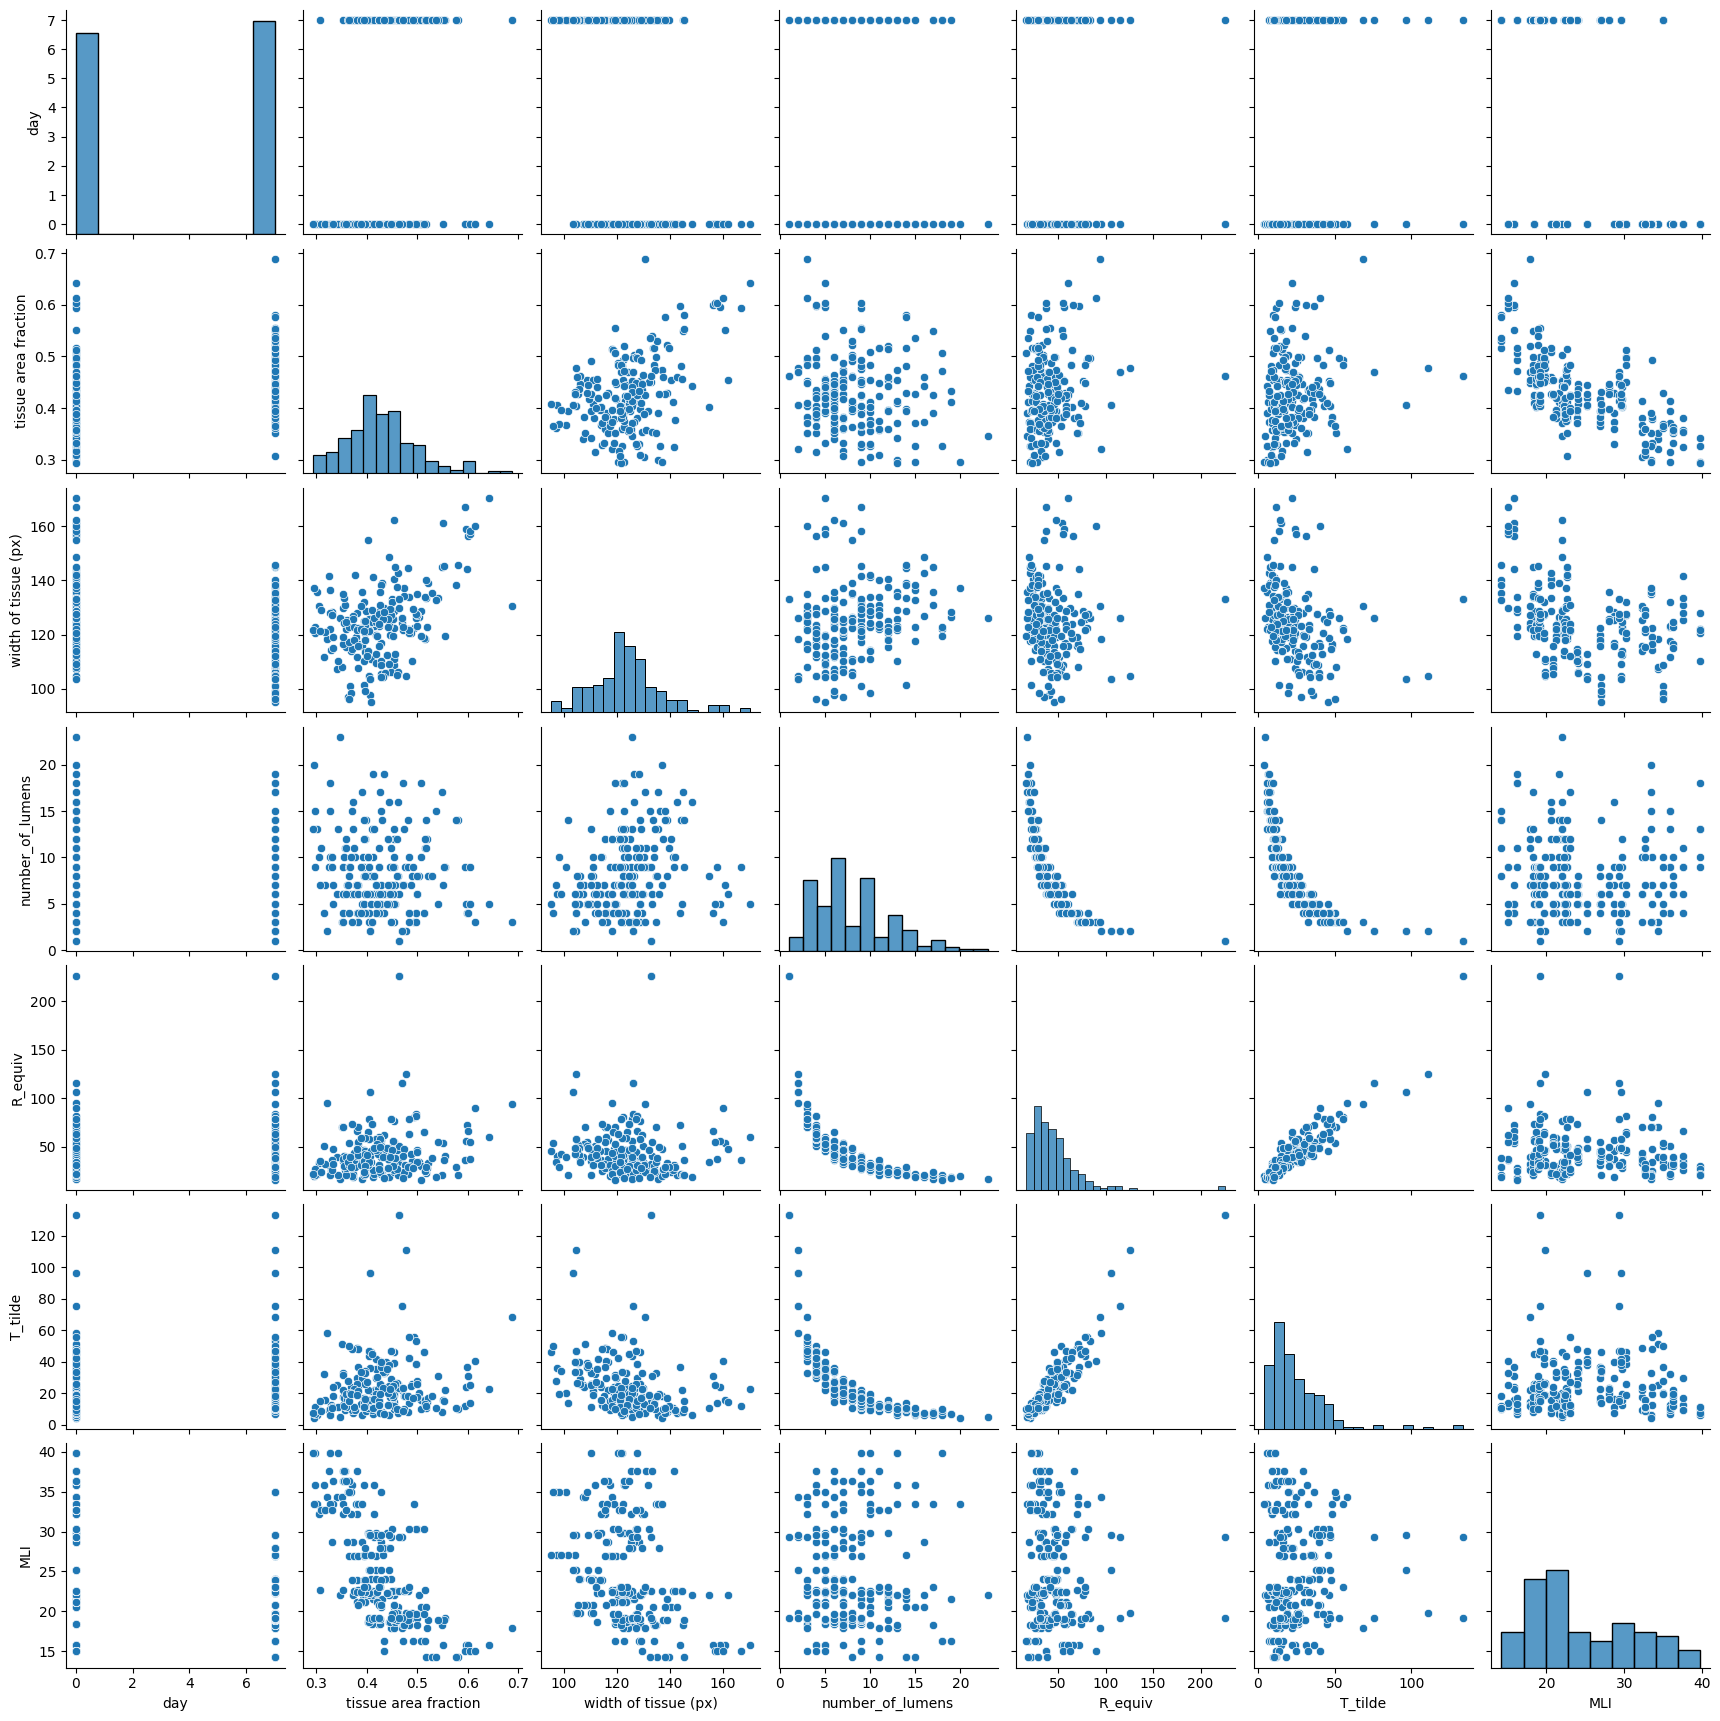

In [9]:
sns.pairplot(data[["day","tissue area fraction", "width of tissue (px)","number_of_lumens","R_equiv","T_tilde","MLI"]])
plt.show()

In [15]:
data.iloc[:,3::].corr()

/var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/ipykernel_95773/2672912431.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.iloc[:,3::].corr()


,tissue area fraction,length of tissue (px),width of tissue (px),number_of_lumens,R_equiv,Rmidpoint,T_tilde,area of tissue (px^2),area of tissue se2,area of tissue se3,area of tissue se4,area of tissue se5,area of tissue se6,area of tissue se7,area of tissue se8,area of tissue se9,area of tissue se10,ID,MLI,MLI_edit pics
tissue area fraction,1.000000,0.744493,0.440892,-0.116341,0.191279,0.335340,0.162883,1.000000,0.894790,0.813972,0.723405,0.624855,0.494114,0.343862,0.163651,0.054300,0.037383,-0.095183,-0.694965,-0.713159
length of tissue (px),0.744493,1.000000,-0.265101,-0.274832,0.231339,0.214692,0.389339,0.744752,0.385295,0.251156,0.163675,0.092275,0.041966,0.000809,-0.016957,-0.037014,-0.021947,-0.057395,-0.498768,-0.523419
width of tissue (px),0.440892,-0.265101,1.000000,0.210459,-0.039788,0.183699,-0.285580,0.440549,0.764967,0.833251,0.823203,0.777861,0.664371,0.494399,0.260548,0.135294,0.087564,-0.046147,-0.336494,-0.329531
number_of_lumens,-0.116341,-0.274832,0.210459,1.000000,-0.716733,-0.098905,-0.723423,-0.116450,0.038258,0.063151,0.080697,0.042734,0.019963,0.031822,0.031040,0.024623,0.013020,-0.217546,-0.019947,-0.006402
R_equiv,0.191279,0.231339,-0.039788,-0.716733,1.000000,0.078067,0.931043,0.191338,0.098568,0.072818,0.058933,0.063951,0.081364,0.094776,0.084375,0.087474,-0.002558,0.146275,-0.060957,-0.073801
Rmidpoint,0.335340,0.214692,0.183699,-0.098905,0.078067,1.000000,0.080655,0.335326,0.311819,0.287615,0.225644,0.206984,0.156740,0.109871,-0.024465,-0.041588,0.044861,0.019861,-0.176450,-0.191377
T_tilde,0.162883,0.389339,-0.285580,-0.723423,0.931043,0.080655,1.000000,0.163049,-0.043790,-0.082824,-0.093998,-0.075351,-0.040828,-0.006953,0.025939,0.048301,-0.016522,0.141500,-0.010799,-0.026773
area of tissue (px^2),1.000000,0.744752,0.440549,-0.116450,0.191338,0.335326,0.163049,1.000000,0.894611,0.813750,0.723173,0.624641,0.493931,0.343730,0.163579,0.054262,0.037355,-0.095172,-0.694949,-0.713149
area of tissue se2,0.894790,0.385295,0.764967,0.038258,0.098568,0.311819,-0.043790,0.894611,1.000000,0.959355,0.875428,0.762750,0.608794,0.428996,0.212505,0.084527,0.055514,-0.094861,-0.651500,-0.659955
area of tissue se3,0.813972,0.251156,0.833251,0.063151,0.072818,0.287615,-0.082824,0.813750,0.959355,1.000000,0.955799,0.860010,0.702735,0.512697,0.265887,0.118344,0.079308,-0.119614,-0.563180,-0.571316


Example image has shape:  (3264, 4908, 3)
RGB values for the top left pixel are: [232 234 227]


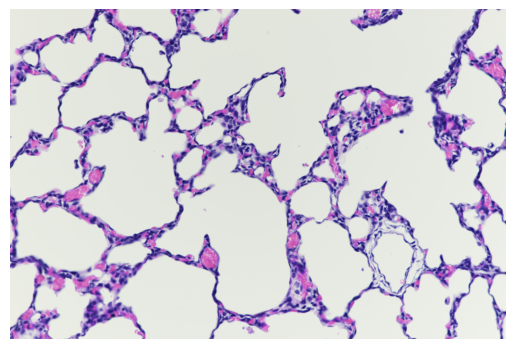

In [4]:
# load and show an image
example_image = io.imread('MLI_all_tiff/{}.tif'.format(data.index[0]))

plt.imshow(example_image)
plt.axis('off')

# print shape
print('Example image has shape: ', example_image.shape)
                    
# print color channel values for top left pixel
print('RGB values for the top left pixel are:', example_image[0,0,:])

In [5]:
X = get_images_array(data)
print(X.shape)

(233, 217, 327, 3)


In [6]:
# split out evaluation sets (x_eval and y_eval)
x_interim, x_eval, y_interim, y_eval = train_test_split(X,
                                           y,
                                           test_size=0.2,
                                           random_state=52)

# split remaining data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_interim, y_interim, test_size=0.4,
                                           random_state=52)

# examine number of samples in train, test, and validation sets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_eval.shape[0], 'eval samples')

x_train shape: (111, 217, 327, 3)
111 train samples
75 test samples
47 eval samples


In [7]:
# initialize standard scaler
ss = StandardScaler()

def scale_features(train_features, test_features):
    for image in train_features:
        # for each channel, apply standard scaler's fit_transform method
        for channel in range(image.shape[2]):
            image[:, :, channel] = ss.fit_transform(image[:, :, channel])
    for image in test_features:
        # for each channel, apply standard scaler's transform method
        for channel in range(image.shape[2]):
            image[:, :, channel] = ss.transform(image[:, :, channel])

# apply scale_features to four sets of features
scale_features(x_interim, x_eval)
scale_features(x_train, x_test)

In [8]:
# set model constants - binary classification ETX or not ETX
num_classes = 1

# define model as Sequential
model = Sequential()

# first convolutional layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(217, 327, 3)))

# add a second 2D convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

2022-11-06 16:49:46.174370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# reduce dimensionality through max pooling
model.add(MaxPooling2D(pool_size = (2,2)))

# third convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add dropout to prevent over fitting
model.add(Dropout(0.25))
# necessary flatten step preceeding dense layer
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))

# add additional dropout to prevent overfitting
model.add(Dropout(0.5))

# prediction layers
model.add(Dense(num_classes, activation="sigmoid", name='preds'))

# show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 21, 21, 64)        0         
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                        

In [10]:
model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=keras.optimizers.SGD(lr=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)

# mock-train the model using the first ten observations of the train and test sets
model.fit(
    x_train[:10, :, :, :],
    y_train[:10],
    epochs=5,
    verbose=1,
    validation_data=(x_test[:10, :, :, :], y_test[:10])
)

/usr/local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 50, 50, 3), found shape=(None, 217, 327, 3)


In [ ]:
# load pre-trained model
pretrained_cnn = keras.models.load_model('datasets/pretrained_model.h5')

# evaluate model on test set
score = pretrained_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("")

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(x_eval, y_eval, verbose=0)
# print loss score
print('Eval loss:', eval_score[0])
# print accuracy score
print('Eval accuracy:', eval_score[1])

In [ ]:
# load history
with open('datasets/model_history.pkl', 'rb') as f:
    pretrained_cnn_history = pickle.load(f)

# print keys for pretrained_cnn_history dict
print(pretrained_cnn_history.keys)

fig = plt.figure(1)
plt.subplot(211)
# plot the validation accuracy
plt.plot(pretrained_cnn_history['val_acc'])
plt.title('Validation accuracy and loss')
plt.ylabel('Accuracy')
plt.subplot(212)
# plot the validation loss
plt.plot(pretrained_cnn_history['val_loss'], 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss value');

In [ ]:
# predicted probabilities for x_eval
y_proba=pretrained_cnn.predict(x_eval)

print("First five probabilities:")
print(y_proba[:5])
print("")

# predicted classes for x_eval
y_pred = np.round(y_proba).astype('int')

print("First five class predictions:")
print(y_pred[:5])
print("")